In [28]:
 from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [29]:
df=pd.read_csv('income.csv')

In [30]:
print('Head',df.head(5))

Head       Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000


<function matplotlib.pyplot.show(*args, **kw)>

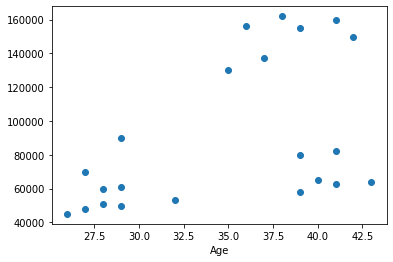

In [31]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.show

In [32]:
model=KMeans(n_clusters=3)
y_predicted=model.fit_predict(df[['Age','Income($)']])

In [33]:
print('\n Predictions',y_predicted)
df['cluster']=y_predicted
print('\n Head: \n',df.head(5))
print('\n Centroids')
print(model.cluster_centers_)


 Predictions [2 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]

 Head: 
       Name  Age  Income($)  cluster
0      Rob   27      70000        2
1  Michael   29      90000        2
2    Mohan   29      61000        1
3   Ismail   28      60000        1
4     Kory   42     150000        0

 Centroids
[[3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]
 [3.40000000e+01 8.05000000e+04]]


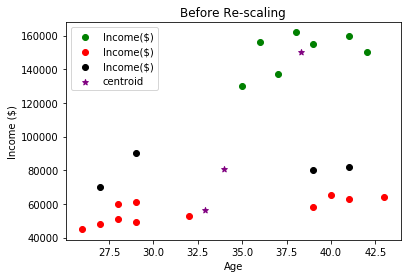

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title('Before Re-scaling')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [35]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [36]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])



Head
      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        2
1  Michael  0.176471   0.384615        2
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        0


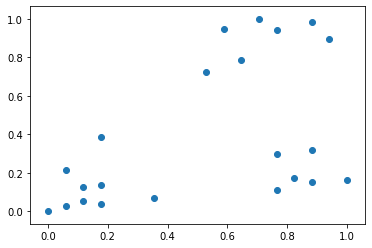

In [37]:
print('\nHead')
print(df.head(5))
plt.scatter(df.Age,df['Income($)'])
plt.show()  

In [38]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
print('\nPredictions', y_predicted)



Predictions [1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0]


In [39]:
df['cluster']=y_predicted
print('\nHead')
print(df.head(5))
print('\nCentroids')
print(model.cluster_centers_)



Head
      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        1
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        2

Centroids
[[3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]
 [3.40000000e+01 8.05000000e+04]]


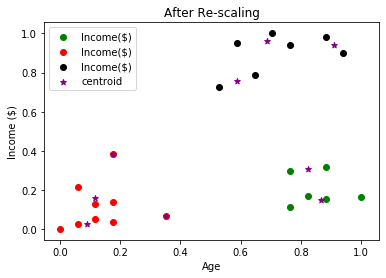

In [45]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title('After Re-scaling')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [43]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)

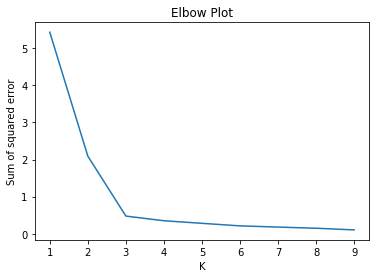

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot')
plt.plot(k_rng,sse)
plt.show()